<a href="https://colab.research.google.com/github/Hikaru-yokoo/EU_M_Math-Repositry/blob/main/chap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl


In [7]:
sample_array = np.arange(10)
sample_array

#再形成
sample_array2 = sample_array.reshape(2,5)
sample_array2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

ブロードキャスト
本来はsample_arrayは配列、3は配列ではないので足し算はできないが
3が[3,3,3,.....3]として計算される。

In [8]:
sample_array + 3

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

補間計算


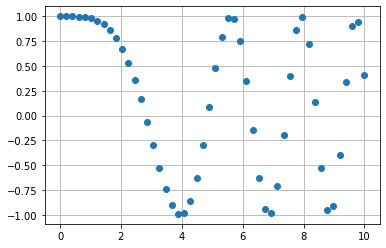

In [19]:
x = np.linspace(0,10, num = 50, endpoint=True)

y = np.cos(-x**2/5.0)
plt.plot(x,y,"o")
plt.grid(True)


線形補間

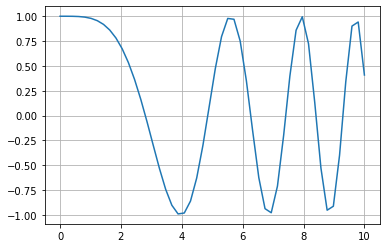

In [20]:
from scipy import interpolate
f = interpolate.interp1d(x, y, "linear")
plt.plot(x,f(x),"-")
plt.grid(True)

スプライン３次補間

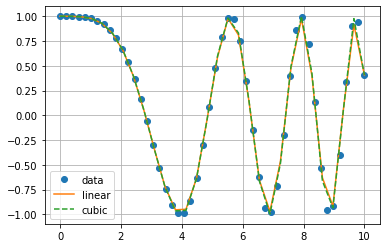

In [22]:
f2 = interpolate.interp1d(x,y, "cubic")

xnew = np.linspace(0,10, num= 30, endpoint = True)

plt.plot(x, y, "o", xnew, f(xnew), "-", xnew, f2(xnew), "--")

plt.legend(["data", "linear", "cubic"], loc = "best")
plt.grid(True)


積分計算

In [23]:
from scipy import integrate
import math

def calcPi(x):
    return 4/(1+x**2)

integrate.quad(calcPi, 0, 1)


(3.1415926535897936, 3.4878684980086326e-14)

sin関数を求める

In [24]:
from numpy import sin
integrate.quad(sin, 0, math.pi/1)


(2.0, 2.220446049250313e-14)

2重積分

In [25]:
def I(n):
    return integrate.dblquad(lambda t, x:np.exp(-x*t)/t**n, 0, np.inf, lambda x:1, lambda x: np.inf)

print("n = 1：", I(1))
print("n = 2：", I(2))
print("n = 3：", I(3))
print("n = 4：", I(4))

n = 1： (1.0000000000048965, 6.360750360104306e-08)
n = 2： (0.4999999999985751, 1.3894083651858995e-08)
n = 3： (0.33333333325010883, 1.3888461883425516e-08)
n = 4： (0.2500000000043577, 1.2983033469368098e-08)


微分方程式の計算
v1, v2, v3 がそれぞれx, y, zに対応している


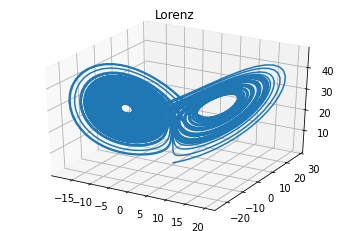

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lorenz_func(v, t, p, r, b):
    return [-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]


p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

v = odeint(lorenz_func, v0, t, args = (p, r, b))

fig = plt.figure()
ax = fig.gca(projection = "3d")
ax.plot(v[:, 0],v[:,1],v[:,2])

plt.title("Lorenz")
plt.grid(True)

最適化
線形計画法について

[1.79128785]
[-2.79128785]


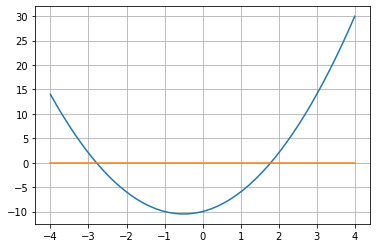

In [28]:
from scipy.optimize import fsolve

def f(x):
    y = 2 * x **2 + 2 * x -10
    return y

x = np.linspace(-4, 4)
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)

#グラフから解がx = 2, -3付近にあることがわかるので以下のようにすると計算してくれる。
x = fsolve(f,2)
print(x)

x = fsolve(f,-3)
print(x)

In [29]:
from scipy.optimize import minimize

#目的となる関数
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1 * x4 * (x1 + x2 + x3) + x3

#制約式1
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3] -25.0

#制約式2
def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
    return sum_sq

x0 = [1,5,5,1]
print(objective(x0))

16
